# ML Mini Project

## Objective

Everyone loves movies irrespective of age, gender, race, color, or geographical location. We all in a way are connected to each other via this amazing medium. Yet what most interesting is the fact that how unique our choices and combinations are in terms of movie preferences. Some people like genre-specific movies be it a thriller, romance, or sci-fi, while others focus on lead actors and directors. When we take all that into account, it’s astoundingly difficult to generalize a movie and say that everyone would like it. But with all that said, it is still seen that similar movies are liked by a specific group of people.

So here’s where we as data scientists come into play and extract the juice out of all the behavioral patterns of not only the audience but also from the movies themselves.

# Libraries

pandas: Data Manipulation

numpy: Math and Matrix Opperations

matplotlib and seaborn: Data Visuallization

scipy: Sparse Matrix creation

## Meta Data

Movie:

    movieId – once the recommendation is done, we get a list of all similar movieId and get the title for each movie from this dataset.
    genres – which is not required for this item-based collaborative filtering approach.

Ratings:

    userId – unique for each user.
    movieId – using this feature, we take the title of the movie from the movies dataset.
    rating – Ratings given by each user to all the movies using this we are going to predict the top 10 similar movies.

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [127]:
links = pd.read_csv('links.csv')
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


## Item-based Collaborative Filtering

The concept in this case is to find similar movies instead of similar users and then recommending similar movies to that ‘A’ has had in his/her past preferences. This is executed by finding every pair of items that were rated/viewed/liked/clicked by the same user, then measuring the similarity of those rated/viewed/liked/clicked across all user who rated/viewed/liked/clicked both, and finally recommending them based on similarity scores.

Here, for example, we take 2 movies ‘A’ and ‘B’ and check their ratings by all users who have rated both the movies and based on the similarity of these ratings, and based on this rating similarity by users who have rated both we find similar movies. So if most common users have rated ‘A’ and ‘B’ both similarly and it is highly probable that ‘A’ and ‘B’ are similar, therefore if someone has watched and liked ‘A’ they should be recommended ‘B’ and vice versa.

### Advantages over User-based Collaborative Filtering

a: Unlike people’s taste, movies don’t change.

b: There are usually a lot fewer items than people, therefore easier to maintain and compute the matrices.

In [5]:
Genres = ['Action', 'Adventure' , 'Animation' , 'Childrens' , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy' , 'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' , 'Thriller' , 'War' , 'Western']

In [6]:
movies[Genres] = 0
movies.head()

,movieId,title,genres,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def ohEnc(movies, Genres):

    for i in movies.index:
        for genre in Genres:
            if genre in str(movies.loc[i, 'genres']):
                movies.loc[i, genre] = 1

In [8]:
ohEnc(movies, Genres)

In [9]:
movies.drop('genres', axis = 1, inplace = True)
movies
movie1 = movies.copy()

In [10]:
movie1.to_csv('GenreMovies.csv')

In [11]:
rating1 = ratings.copy()

In [12]:
rating1.drop('userId', axis = 1, inplace = True)
rating1.drop('timestamp', axis = 1, inplace = True)

In [13]:
rating1.to_csv('GenreRating.csv')

In [14]:
g = 'Action'
m = movie1[movie1[g] == 1]

In [15]:
r = pd.merge(rating1, m, how='inner', on='movieId')

In [16]:
list(r[r['rating'] == 5]['movieId'].value_counts().head(10).index)

[2571, 260, 2959, 110, 1196, 1198, 1210, 589, 2028, 1197]

In [65]:
def getGenreRec(Genre_str : str):
    titles = 
    m = movie1[movie1[Genre_str] == 1]
    r = pd.merge(rating1, m, how='inner', on='movieId')
    ids = list(r[r['rating'] == 5]['movieId'].value_counts().head(10).index)
    print(ids)
    for i in range (len(ids)):
        titles.append(movies.loc[movies.movieId==ids[i], 'title'].values[0])
    return titles

In [147]:
ids = [2571,260,2959,110,1196,1198,1210,589,2028,1197]

In [152]:
str(links.iloc[2571]['imdbId'][0]).zfill(7)

IndexError: invalid index to scalar variable.

In [158]:
str(links[links['movieId'] == 2571]['imdbId'].values[0]).zfill(7)

'0133093'

In [66]:
hehe = getGenreRec('Romance')

In [68]:
hehe[0].type

AttributeError: 'int' object has no attribute 'type'

In [20]:
df = ratings.pivot(index='movieId', columns='userId', values='rating')
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.isna().sum()

userId
1      9492
2      9695
3      9685
4      9508
5      9680
       ... 
606    8609
607    9537
608    8893
609    9687
610    8422
Length: 610, dtype: int64

In [22]:
df.fillna(0,inplace=True)
df.isna().sum()

userId
1      0
2      0
3      0
4      0
5      0
      ..
606    0
607    0
608    0
609    0
610    0
Length: 610, dtype: int64

In [23]:
df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

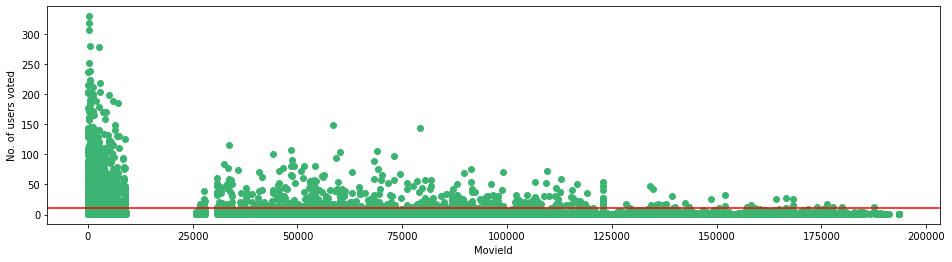

In [25]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

<AxesSubplot:ylabel='Frequency'>

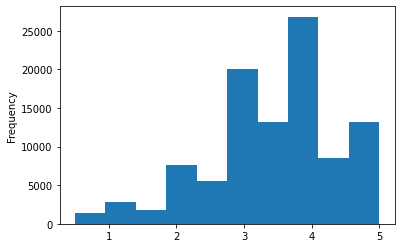

In [26]:
ratings['rating'].plot(kind='hist')

In [27]:
df = df.loc[no_user_voted[no_user_voted > 10].index,:]

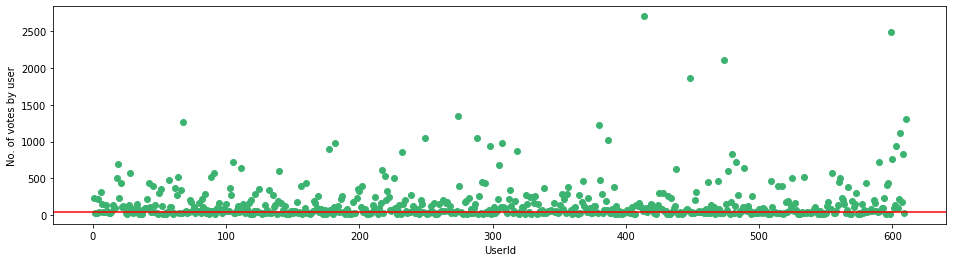

In [28]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

<AxesSubplot:ylabel='Frequency'>

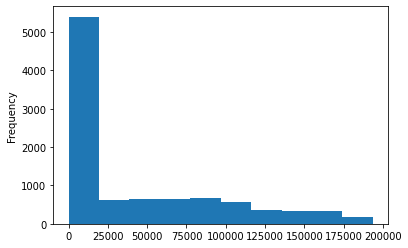

In [29]:
movies['movieId'].plot(kind='hist')

In [30]:
df=df.loc[:,no_movies_voted[no_movies_voted > 50].index]
df

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


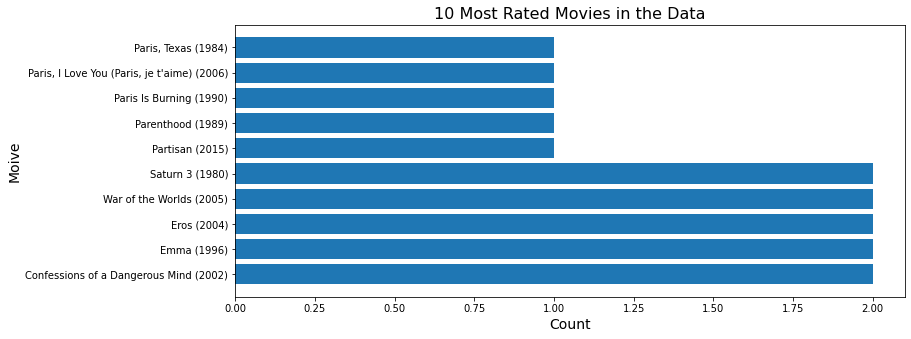

In [31]:
top_ten_movies = movies.groupby("title").size().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("10 Most Rated Movies in the Data", fontsize=16)
plt.ylabel("Moive", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

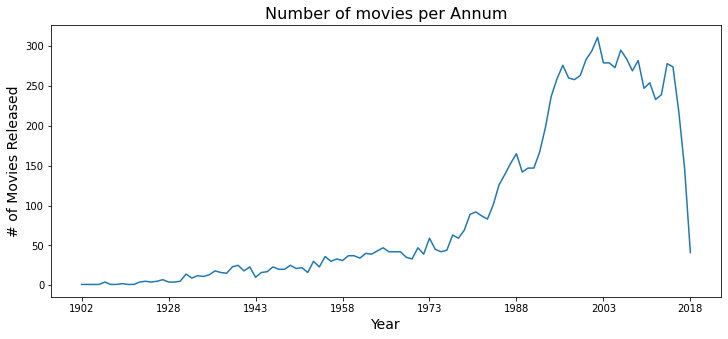

In [32]:
movies["year"] = movies["title"].str.extract("\((\d{4})\)", expand=True)
 
year_counts = movies[["title", "year"]].groupby("year").size()

fig, ax = plt.subplots(figsize=(12, 5)) 
ax.plot(year_counts.index, year_counts.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(9)) # changes the number of xticks we see
plt.title("Number of movies per Annum", fontsize=16)
plt.xlabel("Year", fontsize= 14)
plt.ylabel("# of Movies Released", fontsize=14)
plt.show()

### Model

In [33]:
csr_data = csr_matrix(df.values)
df.reset_index(inplace=True)

In [34]:
df

userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2117,176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2118,177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2119,179819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [140]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = df[df['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = df.iloc[val[0]]['movieId']
            idx = links[links['movieId'] == movie_idx].index
            recommend_frame.append(str(links.iloc[idx]['imdbId'].values[0]).zfill(7))
        return recommend_frame
    else:
        return "No movies found. Please check your input"

In [144]:
ids = list(r[r['rating'] == 5]['movieId'].value_counts().head(10).index)

In [146]:
links[links['movieId'] == ids[0]].index

Int64Index([1939], dtype='int64')

In [141]:
links.loc[links.movieId==6, 'imdbId'].values[0]

113277

### Lets Test the Model

Since we cannot evaluate the model using any metric, we can only evaluate thee model through assessing ourself and seeing if the prediction is accurate 

In [142]:
get_movie_recommendation('Harry Potter')

['0167261',
 '0317705',
 '0145487',
 '0121765',
 '0325980',
 '0198781',
 '0126029',
 '0330373',
 '0304141',
 '0295297']

The Recomendaation System returns all animated or superhero genre movies for 'Iron Man', I would say the reccomendation is pretty good!

In [38]:
get_movie_recommendation('Forrest Gump')

Int64Index([277], dtype='int64')

Again, pretty good predictions